In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("Copy of Simple Pendulum - Linearization - Sheet3.csv")
df

,Square Root of Length,avg period
0,0.887130,1.89
1,0.833667,1.71
2,0.768115,1.44
3,0.707107,1.33
4,0.600000,1.21
5,0.538516,1.09


In [31]:
length_mean = df.iloc[:,0].mean()
length_std = df.iloc[:,0].std()
print(length_mean, length_std)
sum(df.iloc[0:6,0])/6

0.7224224402166667 0.13463647880296103


0.7224224402166667

In [32]:
period_mean = df.iloc[:,1].mean()
period_std = df.iloc[:,1].std()
print(period_mean, period_std)

1.445 0.3042203149035251


In [33]:
x_variance = []
y_variance = []
for i in range(6):
    x_variance.append((df.iloc[i,0] - length_mean)**2)
for i in range(6):
    y_variance.append((df.iloc[i,1] - period_mean)**2)

In [34]:
df['S_xx'] = x_variance
df['S_yy'] = y_variance

In [35]:
covariance = []
for i in range(6):
    covariance.append((df.iloc[i,0] - length_mean)*(df.iloc[i,1] - period_mean))
df['S_xy'] = covariance
#df.plot(kind='scatter', x='S_xx', y='S_yy')
df

,Square Root of Length,avg period,S_xx,S_yy,S_xy
0,0.887130,1.89,0.027129,0.198025,0.073295
1,0.833667,1.71,0.012375,0.070225,0.029480
2,0.768115,1.44,0.002088,0.000025,-0.000228
3,0.707107,1.33,0.000235,0.013225,0.001761
4,0.600000,1.21,0.014987,0.055225,0.028769
5,0.538516,1.09,0.033821,0.126025,0.065287


In [36]:
s_xx_sum = sum(df['S_xx'])
s_yy_sum = sum(df['S_yy'])
s_xy_sum = sum(df['S_xy'])
print(f"The s_xx sum is {s_xx_sum}, the s_yy sum is {s_yy_sum}, and the s_xy sum is {s_xy_sum}")

The s_xx sum is 0.09063490712230088, the s_yy sum is 0.4627499999999999, and the s_xy sum is 0.19836338668649997


In [37]:
r = s_xy_sum/(math.sqrt(s_xx_sum)*math.sqrt(s_yy_sum))
r_squared = r ** 2
print(f"r is {r} and r squared is {r_squared}")

r is 0.9685912774195102 and r squared is 0.9381690626931586


In [38]:
slope = s_xy_sum/s_xx_sum
intercept = (period_mean)-(slope*length_mean)
print(slope, intercept)

2.1885981128532794 -0.13609238934105772


In [39]:
squared_error = []
for i in range(6):
    squared_error.append((df.iloc[i,0]-(slope*df.iloc[i,0])-intercept)**2)
squared_error

[0.8433646979098284,
 0.7306867296082468,
 0.6035536356332475,
 0.4961418815265147,
 0.3330057204594039,
 0.2540031817879395]

In [40]:
df['Squared Error'] = squared_error
SSE = sum(df['Squared Error'])
SSE

3.2607558469251807

In [41]:
# This is my final data
print()
print(f"r is {r} and r squared is {r_squared}")
print(f"The s_xx sum is {s_xx_sum}, the s_yy sum is {s_yy_sum}, and the s_xy sum is {s_xy_sum}")
df


r is 0.9685912774195102 and r squared is 0.9381690626931586
The s_xx sum is 0.09063490712230088, the s_yy sum is 0.4627499999999999, and the s_xy sum is 0.19836338668649997


,Square Root of Length,avg period,S_xx,S_yy,S_xy,Squared Error
0,0.887130,1.89,0.027129,0.198025,0.073295,0.843365
1,0.833667,1.71,0.012375,0.070225,0.029480,0.730687
2,0.768115,1.44,0.002088,0.000025,-0.000228,0.603554
3,0.707107,1.33,0.000235,0.013225,0.001761,0.496142
4,0.600000,1.21,0.014987,0.055225,0.028769,0.333006
5,0.538516,1.09,0.033821,0.126025,0.065287,0.254003


<Axes: xlabel='Square Root of Length', ylabel='avg period'>

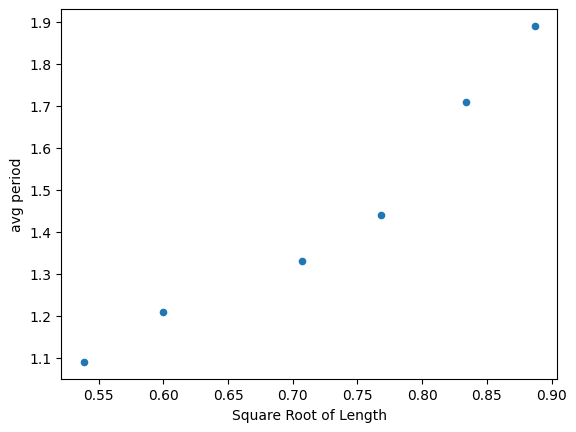

In [42]:
df.plot(kind='scatter', x='Square Root of Length', y='avg period')
# I wasn't able to find out the line of best fit